## Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R(Python in this case) and achieve the following goals:

Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
Present the financial benefit of this project to the marketing team

In [0]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix

In [0]:
data = pd.read_csv("bank-additional-full.csv",sep=";")

In [159]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Convert dataframe to list of dicts

In [0]:
data_dict = data.T.to_dict().values()

## Vectorise features such that text based classifications are transformed into one hot encoded features

In [0]:
vec = DictVectorizer()
signal_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()

In [162]:
df = pd.DataFrame(signal_array,columns=feature_names)
df.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


In [163]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X = signal_array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = signal_array[:,-1]

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=300,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature age (0.164168)
2. feature emp.var.rate (0.117612)
3. feature campaign (0.083686)
4. feature month=sep (0.049868)
5. feature nr.employed (0.032805)
6. feature cons.conf.idx (0.027001)
7. feature poutcome=nonexistent (0.023482)
8. feature cons.price.idx (0.023255)
9. feature education=unknown (0.022363)
10. feature euribor3m (0.021197)
11. feature housing=unknown (0.021177)
12. feature housing=yes (0.017684)
13. feature marital=divorced (0.016696)
14. feature education=professional.course (0.016322)
15. feature education=basic.9y (0.016236)
16. feature marital=married (0.014813)
17. feature poutcome=success (0.014529)
18. feature day_of_week=mon (0.014527)
19. feature day_of_week=wed (0.014365)
20. feature day_of_week=thu (0.014228)
21. feature day_of_week=tue (0.014090)
22. feature job=student (0.014027)
23. feature job=unknown (0.014001)
24. feature loan=unknown (0.013808)
25. feature day_of_week=fri (0.013773)
26. feature education=illiterate (0.011894)
27.

##Plotting the Regression plots of top 10 features


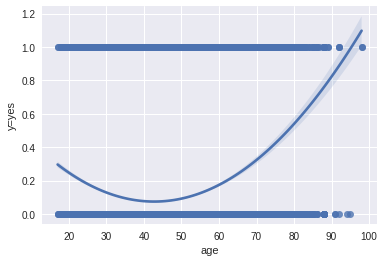

In [164]:
ax = sns.regplot(x="age", y="y=yes", order=2, data=df, truncate=True)

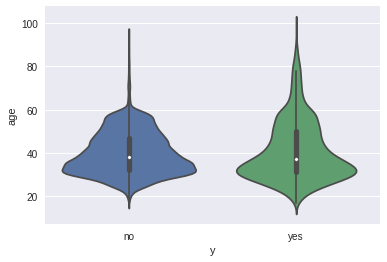

In [165]:
sns.violinplot(x=data.y, y=df.age)


Without getting to an objective measure here, it as at least visually obvious that the yesses (1s) have a thicker tail out past the retirement ages (though we can't assume yet that all these people are "retired" per-se).



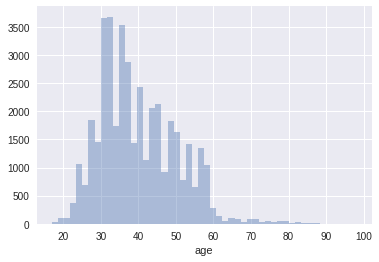

In [166]:
sns.distplot(df.age, kde=False)

When we look at the distribution of ages, we see that the "violin" plots from before can be a bit misleading.

While they seem to tell us that there is an overall trend with age,the age distribution above below tells us that there are very few participants over age 60. So while it may be accurate to say that, within those over 60, there is a trend to say yes- there is likely not a significant trend in this data for those who say yes to be over 60.

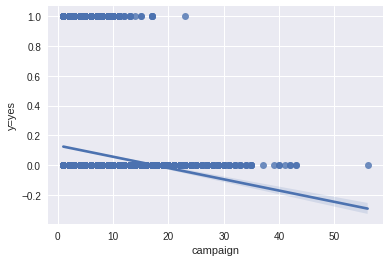

In [167]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=df, truncate=True)
# From this plot we can see that campaigns after 12-13 are useless

##### Shows that any campaign after 13 are useless. 


In [168]:
df.loc[(df['campaign'] >13) & (df['y=yes']==1)].shape
# Remove the .shape parameter to view the data

(8, 65)

In [169]:
df.loc[(df['campaign'] >13) & (df['y=yes']==0)].shape
# Remove the .shape parameter to view the data

(467, 65)

**Since the difference betwen yes and no is huge it is safe to asume that approaching a client more than 13 times is not of much use**

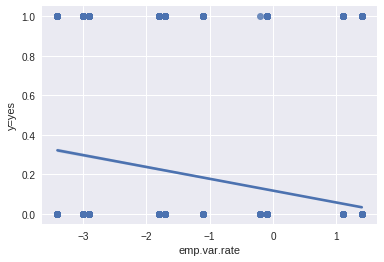

In [170]:

ax = sns.regplot(x="emp.var.rate", y="y=yes", order=1, data=df, truncate=True)


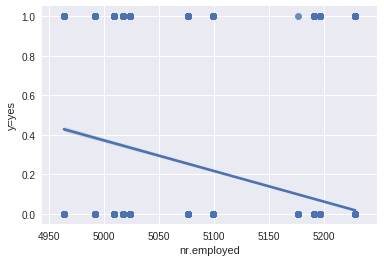

In [171]:

ax = sns.regplot(x="nr.employed", y="y=yes", order=1, data=df, truncate=True)


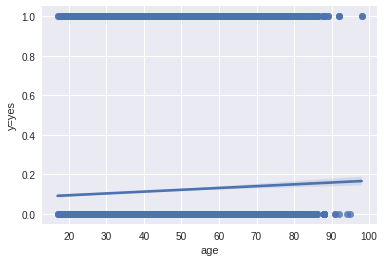

In [172]:
ax = sns.regplot(x="age", y="y=yes", order=1, data=df, truncate=True)


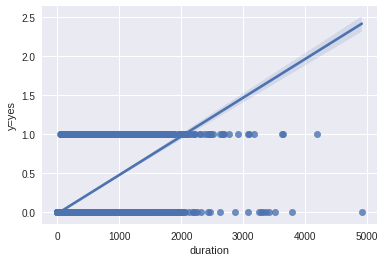

In [173]:
ax = sns.regplot(x="duration", y="y=yes", order=1, data=df, truncate=True)

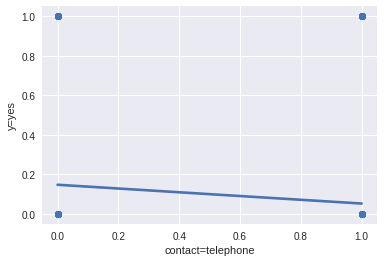

In [174]:

ax = sns.regplot(x="contact=telephone", y="y=yes", order=1, data=df, truncate=True)

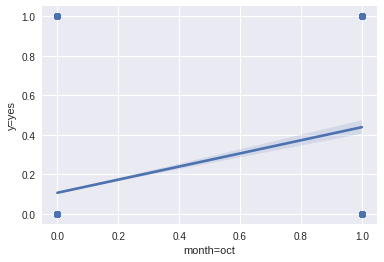

In [175]:

ax = sns.regplot(x="month=oct", y="y=yes", order=1, data=df, truncate=True)

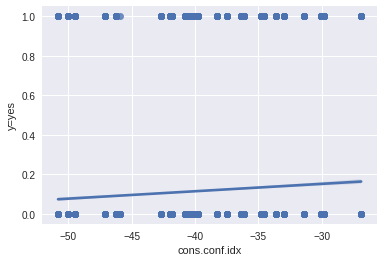

In [176]:

ax = sns.regplot(x="cons.conf.idx", y="y=yes", order=1, data=df, truncate=True)

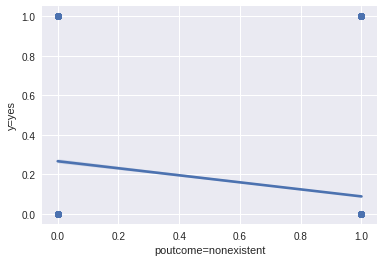

In [177]:

ax = sns.regplot(x="poutcome=nonexistent", y="y=yes", order=1, data=df, truncate=True)

# Let's optimize using campaign

In [178]:
# Total Conversion ratio
sum(df['y=yes'])/sum(df['campaign'])

0.043875408967982296

In [179]:
# Now let's see efficiancy on every additional call
print "Nth Call \t Efficiency"
for i in range(1,25):
    goo = sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(goo))

Nth Call 	 Efficiency
1 		 0.0558415072351
2 		 0.0514312409751
3 		 0.0442355117139
4 		 0.0326129666012
5 		 0.024077046549
6 		 0.0221565731167
7 		 0.0157938487116
8 		 0.00956668542487
9 		 0.0123456790123
10 		 0.0109689213894
11 		 0.0138089758343
12 		 0.00433526011561
13 		 0.00705467372134
14 		 0.00210526315789
15 		 0.00492610837438
16 		 0.0
17 		 0.0131578947368
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.00862068965517
24 		 0.0


The acceptable conversion ratio is 2-6% so it is a fair to say any call after the 6th call is not acceptable since it has a conversion ratio of less than 1.6%

In [180]:
# Calculate how many calls were made in total
total_calls = sum(df['campaign'])
print(total_calls)

105754.0


In [181]:
# Calculate how many calls were made after the 6th call
# Asuming that atleast 6 more call were made on average after the 6th call
extra_calls = sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)


12040.0


In [182]:
# Calculate reduction in marketing cost
reduction=100*extra_calls/total_calls
print(reduction)

11.3849121546


In [183]:
total_sales=float(df[df['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [184]:
less_costly_sales=float(df[(df['campaign'] <= 6) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


In [185]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.6077586207


## Hence a reduction of about 11.38% in marketing costs can be achieved while maintaining 97.6% sales if any person is called a maximum of 6 times.